In [3]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [4]:
df = pd.read_csv(r'API_19_DS2_en_csv_v2_5346672.csv', skiprows = 3)
df.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'API_19_DS2_en_csv_v2_5346672.csv'

In [ ]:
cntry_list = ["CHN", "DEU", "FRA", "GBR", "JPN", "KOR", "MEX", "USA", "ZWE"]
indicator_list = ["AG.LND.FRST.ZS", "EG.ELC.COAL.ZS", "EN.ATM.CO2E.KT", "EN.ATM.METH.KT.CE", "SP.POP.GROW", "EG.ELC.NUCL.ZS", "SP.URB.TOTL.IN.ZS"]
df_cntry = df[df['Country Code'].isin(cntry_list)]
dfc_indicator = df_cntry[df['Indicator Code'].isin(indicator_list)]

C:\Users\KOLHP00024\AppData\Local\Temp\ipykernel_13752\1712660008.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfc_indicator = df_cntry[df['Indicator Code'].isin(indicator_list)]


In [ ]:
data1 = dfc_indicator.drop(dfc_indicator.loc[:,'1960':'1989'].columns, axis = 1)

In [ ]:
df_final = data1.loc[:,['Country Name','Indicator Name','1990','1995','2000','2005','2010','2014']]
df_final[['1990','1995','2000','2005','2010','2014']] = df_final[['1990','1995','2000','2005','2010','2014']].astype(float)

In [ ]:
# Saving file with Years as Columns
df_final.to_csv('df_final.csv')

In [ ]:
# shape from wide to long with melt function in pandas
df2=pd.melt(df_final,id_vars=['Country Name','Indicator Name'],var_name='Year', value_name='values')

# reshape from long to wide in pandas python
df2=df2.pivot(index=['Indicator Name','Year'], columns='Country Name', values='values')
df2.head(5)

Country Name                    China         France        Germany  \
Indicator Name     Year                                               
CO2 emissions (kt) 1990  2.173360e+06  356240.000000  955310.000000   
                   1995  3.088620e+06  352240.000000  874660.000000   
                   2000  3.346530e+06  373120.000000  830280.000000   
                   2005  5.824630e+06  380660.003662  802380.004883   
                   2010  8.474920e+06  347779.998779  773070.007324   

Country Name                    Japan    Korea, Rep.         Mexico  \
Indicator Name     Year                                               
CO2 emissions (kt) 1990  1.090530e+06  247680.000000  269580.000000   
                   1995  1.171010e+06  385410.000000  306840.000000   
                   2000  1.182610e+06  456660.000000  379180.000000   
                   2005  1.212820e+06  481000.000000  432190.002441   
                   2010  1.156480e+06  575219.970703  462869.995117   

Country Name             United Kingdom  United States      Zimbabwe  
Indicator Name     Year                                               
CO2 emissions (kt) 1990   561770.000000   4.844520e+06  16540.000000  
                   1995   526810.000000   5.117040e+06  15480.000000  
                   2000   530890.000000   5.775810e+06  13700.000000  
                   2005   540919.982910   5.753490e+06  10510.000229  
                   2010   482440.002441   5.392110e+06   9600.000381

In [ ]:
# Saving file with Country Name as Columns
df2.to_csv('df2.csv')

In [ ]:
# Summary statistics for some of the variables 
# CO2 emissions 
df2_CO2 = df_final[df_final['Indicator Name']=='CO2 emissions (kt)']
df2CO2 = df2_CO2.drop(['Indicator Name'], axis = 1)
df2CO2t = df2CO2.transpose()
CO2 =df2CO2t.rename(columns=df2CO2t.iloc[0]).drop(df2CO2t.index[0])
CO2 = CO2.astype(float)
print("CO2 Emissions (kt) of countries")
CO2.describe()

CO2 Emissions (kt) of countries


,China,Germany,France,United Kingdom,Japan,"Korea, Rep.",Mexico,United States,Zimbabwe
count,6.000000e+00,6.000000,6.000000,6.000000,6.000000e+00,6.000000,6.000000,6.000000e+00,6.000000
mean,5.485788e+06,828618.336995,352690.001424,509738.331909,1.171762e+06,455676.666260,385483.331299,5.331697e+06,12985.000089
std,3.186946e+06,78132.890136,26104.584456,52963.474084,4.624614e+04,127016.656735,82121.716137,3.775206e+05,2748.714115
min,2.173360e+06,736010.009766,306100.006104,415600.006104,1.090530e+06,247680.000000,269580.000000,4.844520e+06,9600.000381
25%,3.153098e+06,780397.506714,348894.999084,493532.501831,1.160112e+06,403222.500000,324925.000000,5.109667e+06,10902.500153
50%,4.585580e+06,816330.002441,354240.000000,528850.000000,1.176810e+06,468830.000000,405685.001221,5.254575e+06,12889.999962
75%,7.812347e+06,863565.000000,368900.000000,538412.487183,1.205267e+06,551664.978027,454727.493286,5.663145e+06,15035.000000
max,1.000667e+07,955310.000000,380660.003662,561770.000000,1.217120e+06,588090.026855,462869.995117,5.775810e+06,16540.000000


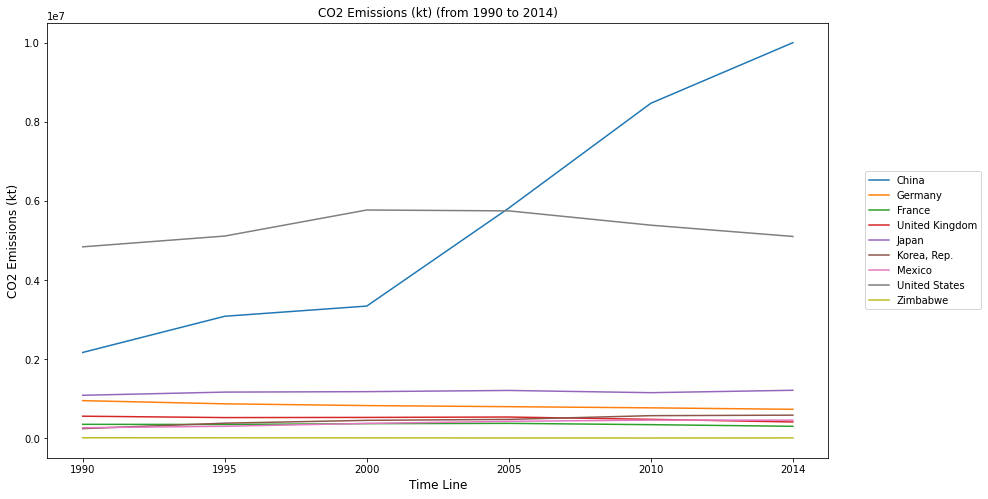

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(CO2)
#add legend
plt.legend(CO2, bbox_to_anchor=(1.04, 0.5), loc="center left")
#add axis labels and a title
plt.ylabel('CO2 Emissions (kt)', fontsize=20)
plt.xlabel('Time Line', fontsize=20)
plt.title('CO2 Emissions (kt) (from 1990 to 2014)', fontsize=22)
plt.show()

In [ ]:
# Electricity production from coal sources (% of total) 
df2_EP_COAL = df_final[df_final['Indicator Name']=='Electricity production from coal sources (% of total)']
df2EPCOAL = df2_EP_COAL.drop(['Indicator Name'], axis = 1)
df2EPCOALt = df2EPCOAL.transpose()
EPCOAL =df2EPCOALt.rename(columns=df2EPCOALt.iloc[0]).drop(df2EPCOALt.index[0])
EPCOAL = EPCOAL.astype(float)
print("Electricity production from coal sources (% of total) ")
EPCOAL.describe()

Electricity production from coal sources (% of total) 


,China,Germany,France,United Kingdom,Japan,"Korea, Rep.",Mexico,United States,Zimbabwe
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,75.336479,50.883054,5.309856,39.641894,23.141816,34.584612,10.348759,48.894535,50.059294
std,3.313363,5.895332,2.034585,13.942785,7.234267,10.535262,2.214062,5.247522,12.902612
min,71.039068,43.642422,2.157029,28.745924,13.489778,16.760779,6.711154,39.650733,31.713791
25%,72.912669,46.444118,4.841425,30.900718,17.936153,30.007633,9.460242,46.962476,44.719909
50%,75.468072,50.745992,5.390886,33.573019,24.319677,38.484479,10.686861,50.978183,50.322167
75%,77.957026,55.003473,5.676266,43.629595,27.208557,41.459333,11.596430,52.546184,53.379617
max,79.196118,58.731124,8.490672,64.967664,32.741934,44.144968,13.056690,53.067350,70.746383


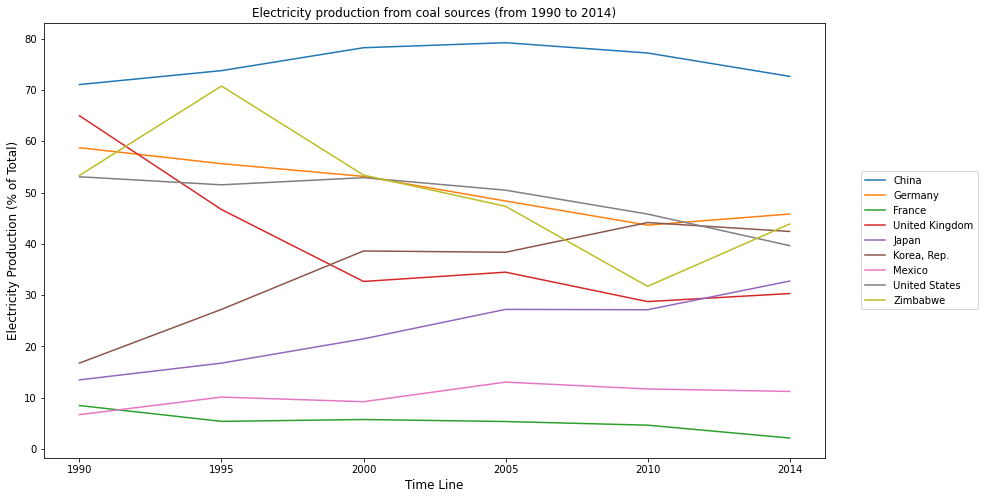

In [ ]:
plt.figure(figsize=(14,8))
plt.plot(EPCOAL)
#add legend
plt.legend(EPCOAL, bbox_to_anchor=(1.04, 0.5), loc="center left")
#add axis labels and a title
plt.ylabel('Electricity Production (% of Total)', fontsize=20)
plt.xlabel('Time Line', fontsize=20)
plt.title('Electricity production from coal sources (from 1990 to 2014)', fontsize=22)
plt.show()

In [ ]:
# Methane gas emissions 
df2_Methane = df_final[df_final['Indicator Name']=='Methane emissions (kt of CO2 equivalent)']
df2Methane = df2_Methane.drop(['Indicator Name'], axis = 1)
df2Methanet = df2Methane.transpose()
Methane =df2Methanet.rename(columns=df2Methanet.iloc[0]).drop(df2Methanet.index[0])
Methane = Methane.astype(float)

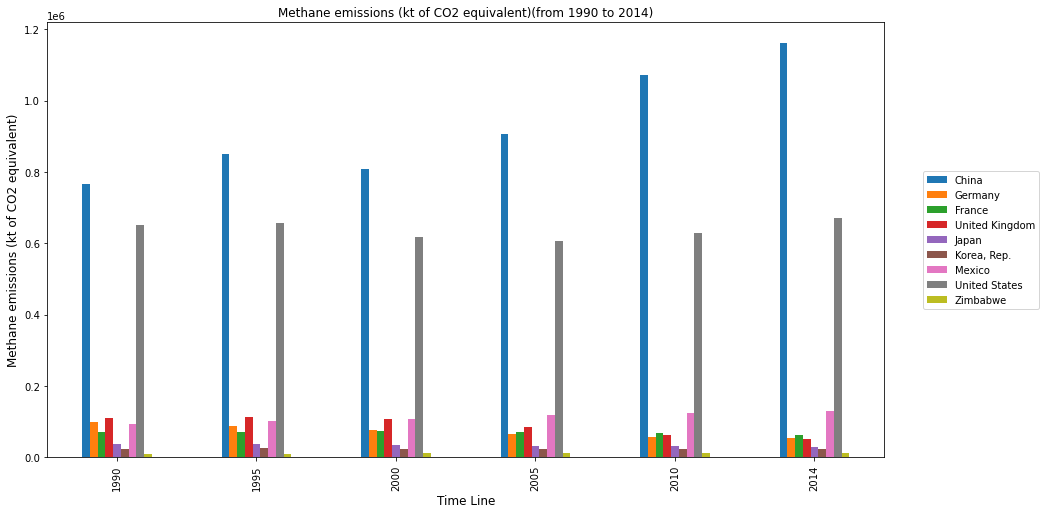

In [ ]:
plt.rcParams['figure.figsize'] = [15,8]
Methane.plot.bar()
#add legend
plt.legend(Methane, bbox_to_anchor=(1.04, 0.5), loc="center left")
#add axis labels and a title
plt.ylabel('Methane emissions (kt of CO2 equivalent)', fontsize=20)
plt.xlabel('Time Line', fontsize=20)
plt.title('Methane emissions (kt of CO2 equivalent)(from 1990 to 2014)', fontsize=22)
plt.show()

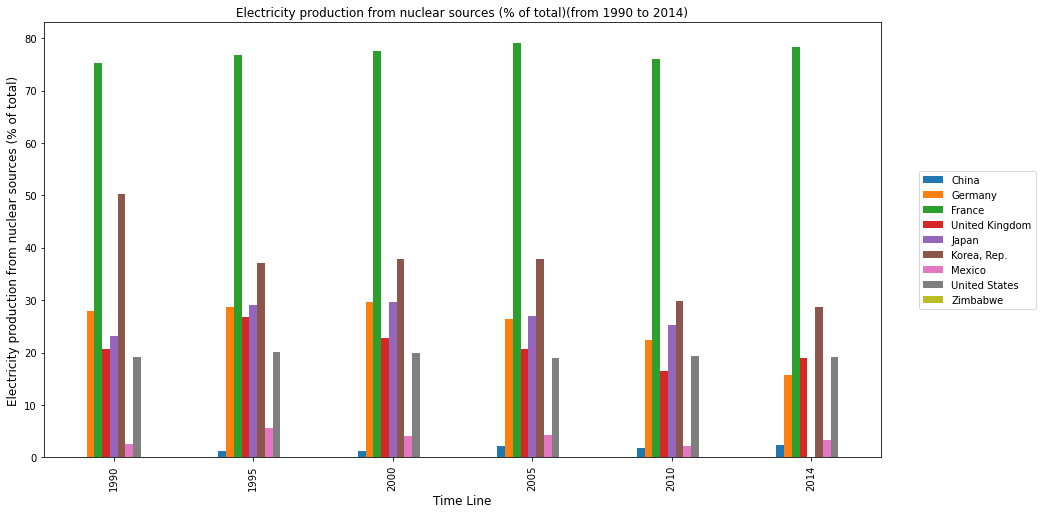

In [ ]:
# Nuclear Power Production 
df2_Nuclear = df_final[df_final['Indicator Name']=='Electricity production from nuclear sources (% of total)']
df2Nuclear = df2_Nuclear.drop(['Indicator Name'], axis = 1)
df2Nucleart = df2Nuclear.transpose()
Nuclear =df2Nucleart.rename(columns=df2Nucleart.iloc[0]).drop(df2Nucleart.index[0])
Nuclear = Nuclear.astype(float)

plt.rcParams['figure.figsize'] = [15,8]
Nuclear.plot.bar()
#add legend
plt.legend(Nuclear, bbox_to_anchor=(1.04, 0.5), loc="center left")
#add axis labels and a title
plt.ylabel('Electricity production from nuclear sources (% of total)', fontsize=20)
plt.xlabel('Time Line', fontsize=20)
plt.title('Electricity production from nuclear sources (% of total)(from 1990 to 2014)', fontsize=22)
plt.show()

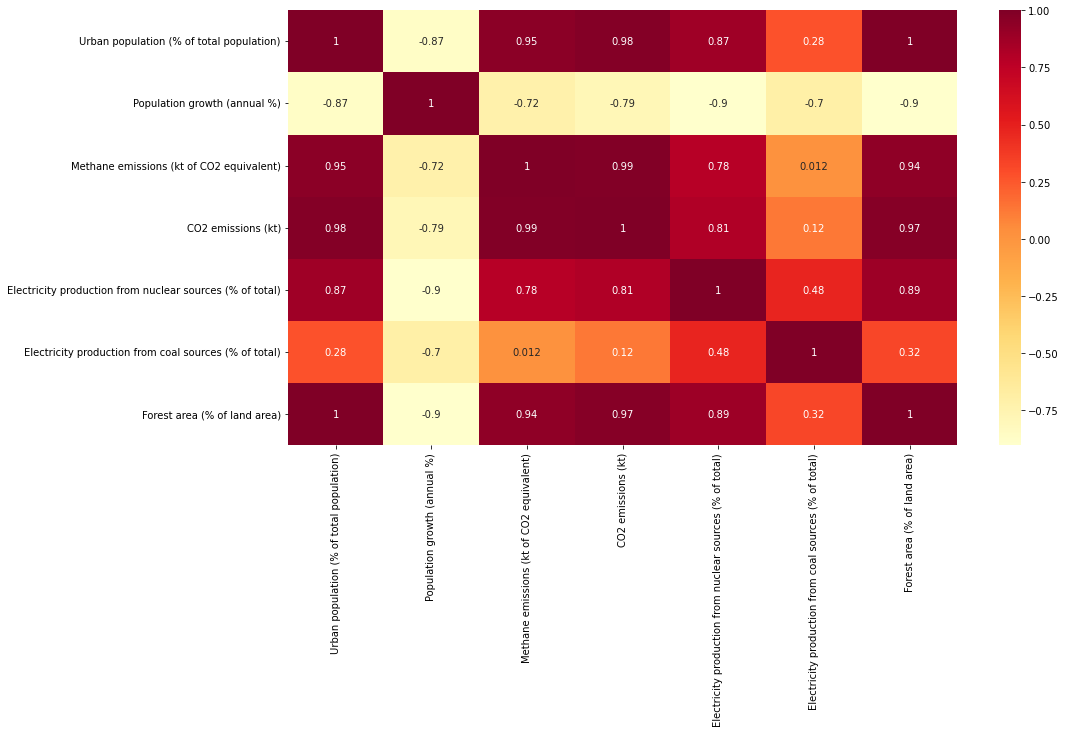

In [ ]:
# Characteristics of China
CH1 = df_final[df_final['Country Name'] == 'China']
CH1 = CH1.drop(['Country Name'], axis = 1)
CH1t = CH1.transpose()
CH1t = CH1t.rename(columns=CH1t.iloc[0]).drop(CH1t.index[0])
CH1t = CH1t.astype(float)
# Creating the Correlation Matrix 
CH1_corr=CH1t.corr(method='pearson')
# CH1_corr.style.background_gradient(cmap = 'Blues', axis = 1)

# plotting correlation heatmap
dataplot = sb.heatmap(CH1_corr, cmap="YlOrRd", annot=True)
  
# displaying heatmap
plt.show()

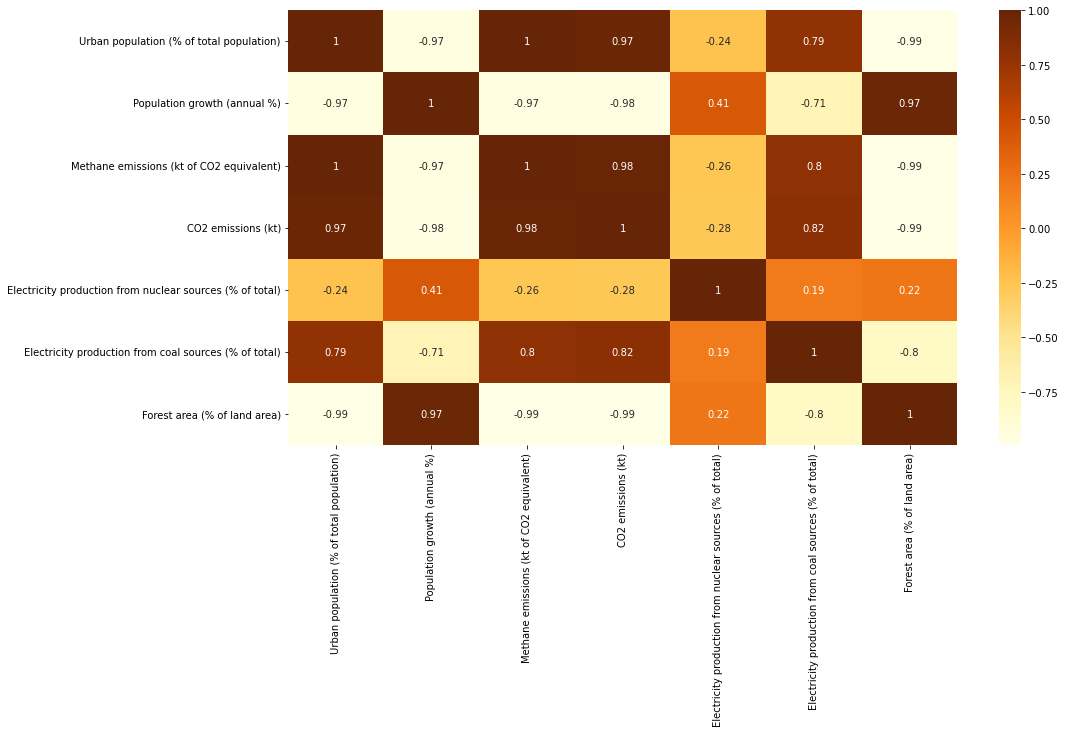

In [ ]:
# Characteristics of Zimbabwe
MX1 = df_final[df_final['Country Name'] == 'Mexico']
MX1 = MX1.drop(['Country Name'], axis = 1)
MX1t = MX1.transpose()
MX1t = MX1t.rename(columns=MX1t.iloc[0]).drop(MX1t.index[0])
MX1t = MX1t.astype(float)
# Creating the Correlation Matrix 
MX1_corr=MX1t.corr(method='pearson')
# MX1_corr.style.background_gradient(cmap = 'Blues', axis = 1)

# plotting correlation heatmap
dataplot = sb.heatmap(MX1_corr, cmap="YlOrBr", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
# Population Growth 
df2_UP = df_final[df_final['Indicator Name']=='Urban population (% of total population)']
df2UP = df2_UP.drop(['Indicator Name'], axis = 1)
df2UP['% change'] = ((df[['1990', '2014']].pct_change(axis=1)['2014']) * 100).round(2).map(str) + '%'
df2UP[['Country Name','1990','1995','2000','2005','2010','2014','% change']]



,Country Name,1990,1995,2000,2005,2010,2014,% change
3040,China,26.442,30.961,35.877,42.522,49.226,54.259,105.2%
4180,Germany,73.118,73.922,74.965,75.980,76.966,77.190,5.57%
5852,France,74.056,74.912,75.871,77.130,78.369,79.394,7.21%
6156,United Kingdom,78.140,78.353,78.651,79.915,81.302,82.365,5.41%
9044,Japan,77.339,78.016,78.649,85.978,90.812,91.304,18.06%
9576,"Korea, Rep.",73.844,78.239,79.621,81.345,81.936,81.707,10.65%
11704,Mexico,71.419,73.368,74.722,76.308,77.815,78.993,10.61%
19076,United States,75.300,77.257,79.057,79.928,80.772,81.483,8.21%
20140,Zimbabwe,28.988,31.732,33.758,34.110,33.196,32.504,12.13%
